# Collision Severity Prediction with Machine Learning Algorithmes - Ramin Ferdos

## Introduction

Traffic Related Collisions are estimated to cost the US economy ~$810bn per year in in property damage, medical costs, legal bills and loss of earnings. with proper use of data and technique we can reduce this cost by identifying risk factors and controlling them.

It's obvious that there are a number of factors related to the severity of road traffic collisions, for instance we can name a few of this factors:
- environmental conditions such as weather, road , lightning and etc.
- time and day of week
- driving related conditions such as speeding, driving under influence, lack of attention and etc.
- the speed and angle of collision are also two important factors.
- and etc.


while a number of this factors may individually be a good predictor, but some of them are rarely occured together, for instance head on collision on free ways are pretty rare due to the blocks and dividers between the directions.
with studying and analyzing historical data of collisions we can interpret valuable insights which will eventually help authorities and activist to reduce severity of collisions. other helpful aspect of this prediction can be the power of foreseeing a collision based on observations and dispatching emergency units accordingly, for instance when a call center recieves a call about a collision in specific intersection, operator could acquire important factors from caller and feeding it to this application, the result will be a probability of injury and severity of it, so dispatcher could dispatch units according to severity. this insight can reduce fatal casualties of a collision significantly.

The two main beneficiaries of building this kind of model are (1) town/city planners, who may be able to use the model to inform their road planning and traffic calming strategies and (2) emergency service responders, who may be able to use the model to predict the severity of an accident based on information that’s provided at the time the accident is reported in order to optimally allocate resources across the city.

In this notebook, we are going to analyze histoical data which about accidents and its severities, then with using machine learning algorithmes predicting the severity of newly entered collisions. We are approaching this problem with CRISP-DM Methodologies and further you can find related steps with sections.

---

## First Step - Business Understanding

There are plenty of severity related to collisons, for example, in a collision severities may be fatality, serious injury, injury, prop damage and etc. but we are reducing this types to two situation: **1. Property only damage collisions and 2. Injury collision.**

A dataset of more than 221000 accidents occurring from 2014 to now (September 2020) in the Seattle city area was obtained from the Seattle Data Portal. The dataset has 40 columns describing the details of each accident including the weather conditions, collision type, road type, date/time of accident and location.

With appropriate data we can extract valuable knowledge from this prediction we are going to just name a few, for instance, we can understand the probability of injuries in types of collisions for example, rear end collisions result injuries or sidesweeps? also we can mark dangerous spots which the occurance of injury collisions in them are siginifcant, another insight which we can extract is the occurance of collisions especially injury ones in which weathers are more.
so, our problem is predicting severity type of collions based on some features. we will talk about features further.

---

## Second Step - Analytical Approach

Based on the definition of problem, we are going to classify collisions, to two categories. obviously, we need to use classification algorithmes for this problem, there are multiple classifications algorithmes:
- K Nearest Neighbor
- Decision Tree
- Logistic Regression
- Support Vector Machine
- and etc.

It seems like Logistic Regression is a good approach for this problem since our dependent variable (Y) can be just two states (severity of collison type) and also this algorithmes will give us the probablity of each state (i.e for a specific sitations we are predicting that this collison severity will be 89% property damage and 11% injury.)

------

## Third Step - Data Requirements

As we discussed previously, we need data in order to predict our dependent variable. Our data should meet some requirements and sufficient features to make this prediction happen. Fortunately we have a rich data set containing required features and labels to predict. We will use effective features of this dataset as independent variable (x) and make this prediction happening.

----

## Fourth Step - Data Collections

In this step data scientists try to gather their required data as initial dataset to process it and clean it and predict based on it. Fortunately IBM hosted our data set which you can download using this link : [Downloading Dataset](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv) 

Also this Dataset is available at this project's GitHub Repository.
In this section we are going to load our data and explore it for a little bit.

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [154]:
collisions = pd.read_csv('Data-Collisions.csv')
print('Data is successfully read.')

Data is successfully read.


C:\Users\Ramin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [155]:
collisions.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 14:54,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 18:55,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [156]:
print(f'Our Initial Dataset contains {collisions.shape[0]} records and {collisions.shape[1]} features.')

Our Initial Dataset contains 194673 records and 38 features.


as you can see above we have read the data successfully, checked its heads and discovered number of total records and features.

----

## Fifth Step - Data Preparations

This section is one the most important steps in our methodology. In this step we are going to prepare our data to process and prediction. this step takes most of projects times usually and should be taken with caution. Fortunately since our dataset is clear and processed this important step is not a sore thumb in our project. Regardless, we should go through this step carefully and completely.

Looking to our dataset, we will understand that our severity codes signifies this:
1. Property Damage Only Collision
2. Injury Collision

In [157]:
collisions['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

According to our dataset, out of 194673 records, 136485 records of collisions were 'Property damage only collisions' and 58188 were 'injury collisions'.
There are some feature which won't help us to predict and we can delete them, this features are like:
- REPORTNO
- STATUS
- INCKEY
- etc.

also since logistic regression cant work with date time variables we need to drop them also.

In [158]:
collisions.columns = collisions.columns.str.lower()
collisions.drop(columns=['x','y','objectid','status','inckey','coldetkey','reportno','intkey','location','severitydesc','sdot_colcode','incdate','incdttm',
                         'exceptrsncode','exceptrsndesc','seglanekey','crosswalkkey','severitycode.1','sdotcolnum','st_colcode',], inplace=True)

In [159]:
collisions.head()

,severitycode,addrtype,collisiontype,personcount,pedcount,pedcylcount,vehcount,junctiontype,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,speeding,st_coldesc,hitparkedcar
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,Entering at angle,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,From same direction - both going straight - bo...,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN,One parked--one moving,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,From same direction - all others,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,Entering at angle,N


now we have to make our dataset cohesive. It means that everywhere we have 'No,no,n,0,null,NaN' should be changed into 0 and everywhere we have 'Yes,y,yes,1' should be changed into 1.

In [160]:
test = collisions
test['speeding'] = test['speeding'].replace(np.nan, 0)
test['speeding'] = test['speeding'].replace('Y', 1)

test['pedrownotgrnt'] = test['pedrownotgrnt'].replace(np.nan, 0)
test['pedrownotgrnt'] = test['pedrownotgrnt'].replace('Y', 1)

test['underinfl'] = test['underinfl'].replace('N', 0)
test['underinfl'] = test['underinfl'].replace('0', 0)
test['underinfl'] = test['underinfl'].replace(np.nan, 0)
test['underinfl'] = test['underinfl'].replace('Y', 1)
test['underinfl'] = test['underinfl'].replace('1', 1)
test['underinfl'] = test['underinfl'].astype(int)

test['inattentionind'] = test['inattentionind'].replace(np.nan, 0)
test['inattentionind'] = test['inattentionind'].replace('Y', 1)

test['hitparkedcar'] = test['hitparkedcar'].replace('N', 0)
test['hitparkedcar'] = test['hitparkedcar'].replace('Y', 1)

print(test['speeding'].value_counts())
print(test['pedrownotgrnt'].value_counts())
print(test['underinfl'].value_counts())
print(test['inattentionind'].value_counts())
print(test['hitparkedcar'].value_counts())


0    185340
1      9333
Name: speeding, dtype: int64
0    190006
1      4667
Name: pedrownotgrnt, dtype: int64
0    185552
1      9121
Name: underinfl, dtype: int64
0    164868
1     29805
Name: inattentionind, dtype: int64
0    187457
1      7216
Name: hitparkedcar, dtype: int64


as you can see above we are managead our data points so all trues are '1' and all falses are '0'.
we can now replace our dataset with test dataset.

In [161]:
collisions = test
collisions.head()

,severitycode,addrtype,collisiontype,personcount,pedcount,pedcylcount,vehcount,junctiontype,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,speeding,st_coldesc,hitparkedcar
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Overcast,Wet,Daylight,0,0,Entering at angle,0
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,Raining,Wet,Dark - Street Lights On,0,0,From same direction - both going straight - bo...,0
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,Overcast,Dry,Daylight,0,0,One parked--one moving,0
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,From same direction - all others,0
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Raining,Wet,Daylight,0,0,Entering at angle,0


### Data Exploration:
In this section we are going to explore our data and extract some observations from it.

first thing we do is checking the occurance of severitycode = 1 (it means the collisions was only property damage) and severitycode = 2 (it means the collisions had injuries.)

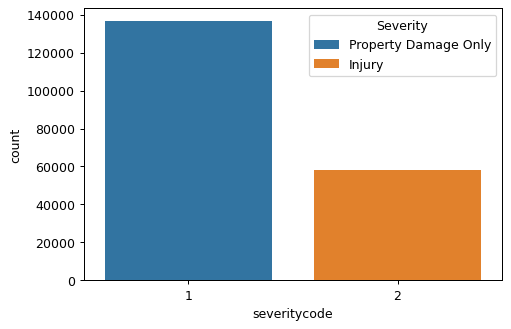

In [162]:
plt.figure(figsize=(6,4), dpi=90)
g = sns.countplot(x="severitycode", data=collisions, dodge = False, hue='severitycode')
h,l = g.get_legend_handles_labels()
labels=['Property Damage Only','Injury']
g.legend(h,labels,title="Severity", loc="upper right") 
plt.show()

In [163]:
count_severity_1 = len(collisions[collisions['severitycode'] == 1])
count_severity_2 = len(collisions[collisions['severitycode'] == 2])
percent_1 = count_severity_1 / (collisions['severitycode'].count())
percent_2 = count_severity_2 / (collisions['severitycode'].count())
print(f'{round(percent_1 * 100,2)} % of collisions were "Property Damage Only" and {round(percent_2 * 100,2)} % of collisions were "Injury".')

70.11 % of collisions were "Property Damage Only" and 29.89 % of collisions were "Injury".


In [164]:
collisions.groupby('severitycode').mean()

,personcount,pedcount,pedcylcount,vehcount,inattentionind,underinfl,pedrownotgrnt,speeding,hitparkedcar
severitycode,,,,,,,,,
1,2.329348,0.005268,0.004975,1.943312,0.142199,0.040730,0.00337,0.042510,0.049588
2,2.714357,0.111896,0.083316,1.867928,0.178679,0.061215,0.07230,0.060683,0.007699


On Average, severities which lead to injury had more people engaged in them. also collisions with pedestarian involve leads to more injury severities.

In [165]:
collisions.groupby('addrtype').mean()

,severitycode,personcount,pedcount,pedcylcount,vehcount,inattentionind,underinfl,pedrownotgrnt,speeding,hitparkedcar
addrtype,,,,,,,,,,
Alley,1.109188,1.898802,0.049268,0.010652,1.671105,0.121172,0.054594,0.011984,0.043941,0.002663
Block,1.237115,2.388549,0.016813,0.018554,1.956802,0.174125,0.053677,0.007067,0.057388,0.053882
Intersection,1.427524,2.571984,0.077670,0.048563,1.855279,0.114938,0.034378,0.057753,0.030152,0.002705


On Average,:
- Intersections' Collisions are more severe than alley and block ones.
- more persons are involved in intersection collisions and block ones.
- more vehicles are involved in block collisions.
- people who are underinfluence more likely to have collisions in alleies and blocks than intersections.
- speeding leads to collisions in blocks more than intersection and allies.


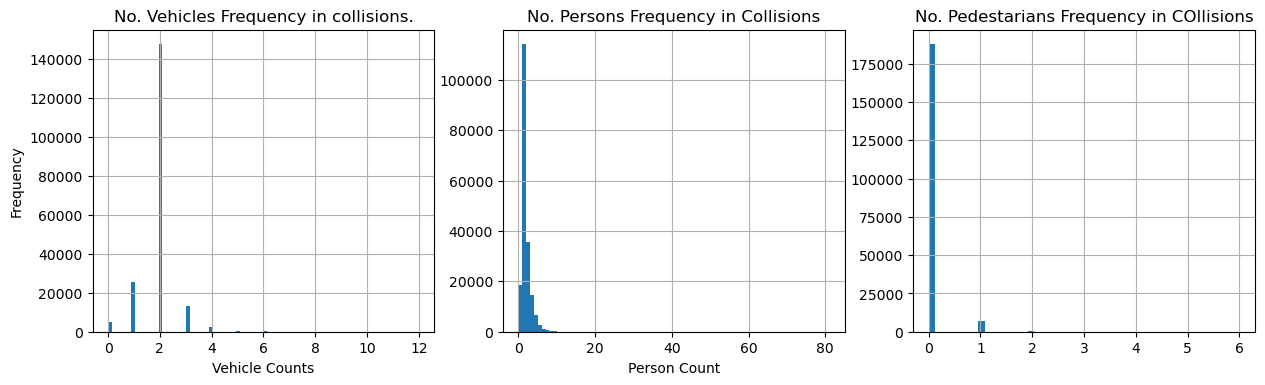

In [166]:
plt.figure(figsize=(15,4), dpi=100)
plt.subplot(1,3,1)
collisions.vehcount.hist(bins = 80)
plt.title('No. Vehicles Frequency in collisions.')
plt.xlabel('Vehicle Counts')
plt.ylabel('Frequency')
plt.subplot(1,3,2)
collisions.personcount.hist(bins = 80)
plt.title('No. Persons Frequency in Collisions')
plt.xlabel('Person Count')
plt.subplot(1,3,3)
collisions.pedcount.hist(bins = 50)
plt.title('No. Pedestarians Frequency in COllisions')
plt.show()

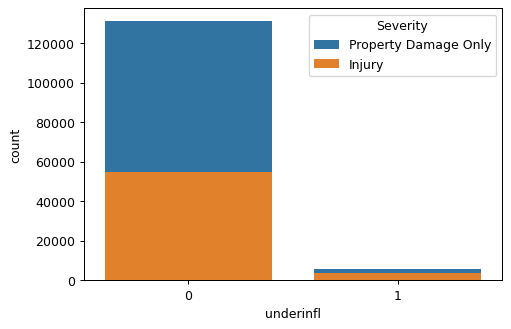

as you can see in the graph above, people are driving far more responsibly as the number of responsible drivers are 185552 relative to people who dont drive responsibly which their counts are: 9121.
95.31% of drivers drives responsibly but still 4.69% of drivers drive irresponsibly.
another fact to have in mind is if you drive irresponsibly, you are more likely to injur yourself and/or others since:
29.44% of cases of driving not underinfl resulted in injury but 39.05% of cases driving irresponsibly resulted injury.


In [167]:
plt.figure(figsize=(6,4), dpi=90)
g = sns.countplot(x="underinfl", data=collisions, dodge = False, hue='severitycode')
h,l = g.get_legend_handles_labels()
labels=['Property Damage Only','Injury']
g.legend(h,labels,title="Severity", loc="upper right") 
plt.show()
underinfl_count0 = len(collisions[collisions['underinfl'] == 0])
underinfl_count1 = len(collisions[collisions['underinfl'] == 1])
percent_0 = underinfl_count0 / (collisions['underinfl'].count())
percent_1 = underinfl_count1 / (collisions['underinfl'].count())

print(f'as you can see in the graph above, people are driving far more responsibly as the number of responsible drivers are {underinfl_count0}',
     f'relative to people who dont drive responsibly which their counts are: {underinfl_count1}.')
print(f'{round(percent_0 * 100, 2)}% of drivers drives responsibly but still {round(percent_1 * 100, 2)}% of drivers drive irresponsibly.')
percent_underinfl0_severity2 = len(collisions[(collisions['underinfl'] == 0) & (collisions['severitycode'] == 2)]) / underinfl_count0
percent_underinfl1_severity2 = len(collisions[(collisions['underinfl'] == 1) & (collisions['severitycode'] == 2)]) / underinfl_count1
print('another fact to have in mind is if you drive irresponsibly, you are more likely to injur yourself and/or others since:')
print(f'{round(percent_underinfl0_severity2 * 100, 2)}% of cases of driving not underinfl resulted in injury but {round(percent_underinfl1_severity2 * 100, 2)}% of cases driving',
      'irresponsibly resulted injury.')

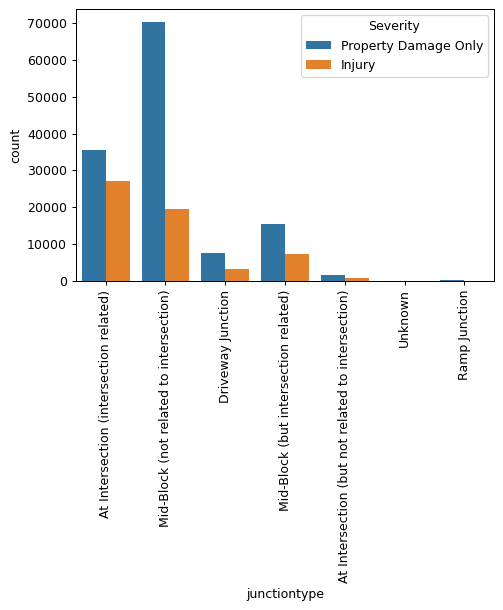

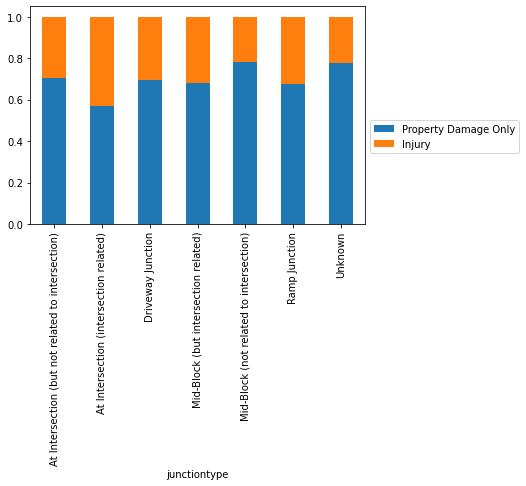

as you can see collisons are much more common in mid-blocks since there are 89800 incidents but there are only 62810 incidents only.
also you can see the probablity of property damage only in mid block incidents are more than injury ones since 78.39% is property damage only and 21.61% is injury incidents.
the other useful insight is that at intersection inccidents are more severe since 30.26% of those resulted in injuries but only 21.61% incidents of mid block resulted in injuries.


In [168]:
plt.figure(figsize=(6,4), dpi=90)
g = sns.countplot(x="junctiontype", data=collisions, dodge = True, hue='severitycode')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
h,l = g.get_legend_handles_labels()
labels=['Property Damage Only','Injury']
g.legend(h,labels,title="Severity", loc="upper right") 
table = pd.crosstab(collisions.junctiontype, collisions.severitycode)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.legend(['Property Damage Only', 'Injury'], bbox_to_anchor = (1, 0.5))
plt.show()
midblock_count = len(collisions[collisions['junctiontype'] == 'Mid-Block (not related to intersection)'])
atintersection_count = len(collisions[collisions['junctiontype'] == 'At Intersection (intersection related)'])
print(f'as you can see collisons are much more common in mid-blocks since there are {midblock_count} incidents but there are only {atintersection_count} incidents only.')
midblock_severity1 = len(collisions[(collisions['junctiontype'] == 'Mid-Block (not related to intersection)') & (collisions['severitycode'] == 1)]) / midblock_count
midblock_severity2 = len(collisions[(collisions['junctiontype'] == 'Mid-Block (not related to intersection)') & (collisions['severitycode'] == 2)]) / midblock_count
print(f'also you can see the probablity of property damage only in mid block incidents are more than injury ones since {round(midblock_severity1 * 100, 2)}% is property damage only',
     f'and {round(midblock_severity2 * 100, 2)}% is injury incidents.')
atintersection_severity1 = len(collisions[(collisions['junctiontype'] == 'At Intersection (intersection related)') & (collisions['severitycode'] == 1)]) / midblock_count
atintersection_severity2 = len(collisions[(collisions['junctiontype'] == 'At Intersection (intersection related)') & (collisions['severitycode'] == 2)]) / midblock_count
print(f'the other useful insight is that at intersection inccidents are more severe since {round(atintersection_severity2 * 100 ,2)}% of those resulted in injuries',
     f'but only {round(midblock_severity2 * 100 ,2)}% incidents of mid block resulted in injuries.')

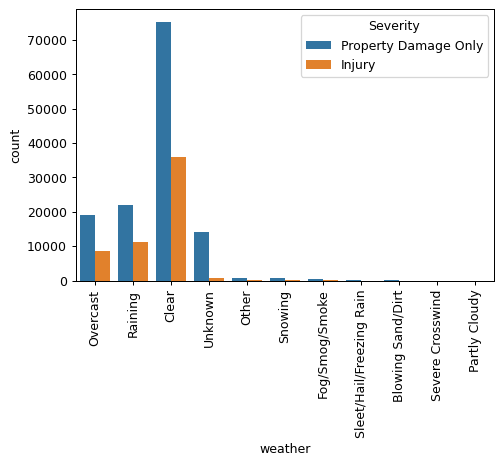

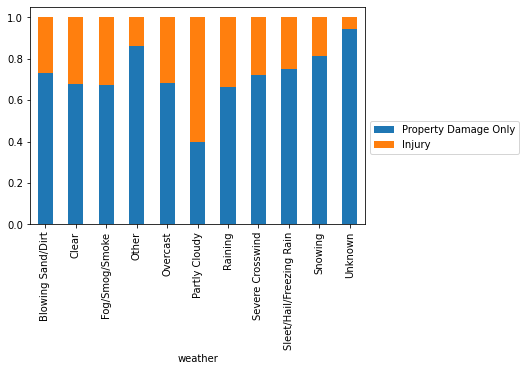

overcast injury incidents percentage: 31.55%.
raining injury incidents percentage: 33.72%.
clear injury incidents percentage: 32.25%.


In [169]:
plt.figure(figsize=(6,4), dpi=90)
g = sns.countplot(x="weather", data=collisions, dodge = True, hue='severitycode')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
h,l = g.get_legend_handles_labels()
labels=['Property Damage Only','Injury']
g.legend(h,labels,title="Severity", loc="upper right")
table = pd.crosstab(collisions.weather, collisions.severitycode)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.legend(['Property Damage Only', 'Injury'], bbox_to_anchor = (1, 0.5))

plt.show()
overcast_count = len(collisions[collisions['weather'] == 'Overcast'])
raining_count = len(collisions[collisions['weather'] == 'Raining'])
clear_count = len(collisions[collisions['weather'] == 'Clear'])
overcast_severity1 = len(collisions[(collisions['weather'] == 'Overcast') & (collisions['severitycode'] == 1)]) / overcast_count
overcast_severity2 = len(collisions[(collisions['weather'] == 'Overcast') & (collisions['severitycode'] == 2)]) / overcast_count
raining_severity1 = len(collisions[(collisions['weather'] == 'Raining') & (collisions['severitycode'] == 1)]) / raining_count
raining_severity2 = len(collisions[(collisions['weather'] == 'Raining') & (collisions['severitycode'] == 2)]) / raining_count
clear_severity1 = len(collisions[(collisions['weather'] == 'Clear') & (collisions['severitycode'] == 1)]) / clear_count
clear_severity2 = len(collisions[(collisions['weather'] == 'Clear') & (collisions['severitycode'] == 2)]) / clear_count
print(f'overcast injury incidents percentage: {round(overcast_severity2 * 100, 2)}%.')
print(f'raining injury incidents percentage: {round(raining_severity2 * 100, 2)}%.')
print(f'clear injury incidents percentage: {round(clear_severity2 * 100, 2)}%.')


as you can see in the cell above, weather nowdays is not deciding factor in the type of injuries. collisions are breifly equals in severity through different weathers. this fact is probably due to the new technologies in vehicles, tires and infrastructure of cities and a good indicator for mitigation measures for bad weathers in areas mentioned.

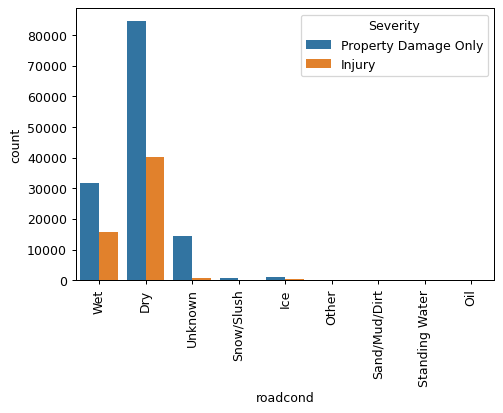

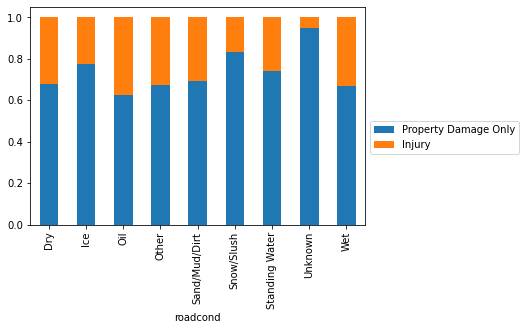

In [170]:
plt.figure(figsize=(6,4), dpi=90)
g = sns.countplot(x="roadcond", data=collisions, dodge = True, hue='severitycode')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
h,l = g.get_legend_handles_labels()
labels=['Property Damage Only','Injury']
g.legend(h,labels,title="Severity", loc="upper right") 
table = pd.crosstab(collisions.roadcond, collisions.severitycode)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.legend(['Property Damage Only', 'Injury'], bbox_to_anchor = (1, 0.5))
plt.show()

since the two fields of Road Condition and Weather Condition are correlated we can extract the same insights which we understand from Weather Condition.

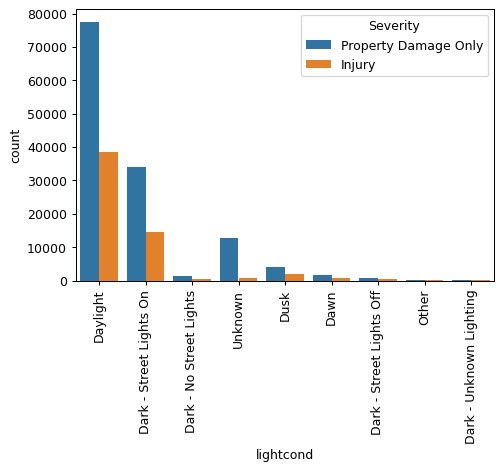

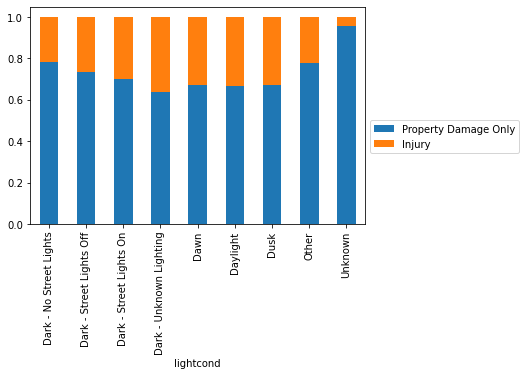

percentage of incidents in daylight resulted injuries : 33.19%.
percentage of incidents in dark with street lights on resulted in injuries : 29.84%.
percentage of streets with lights on in contrast of all street: 94.64%


In [171]:
plt.figure(figsize=(6,4), dpi=90)
g = sns.countplot(x="lightcond", data=collisions, dodge = True, hue='severitycode')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
h,l = g.get_legend_handles_labels()
labels=['Property Damage Only','Injury']
g.legend(h,labels,title="Severity", loc="upper right")
table = pd.crosstab(collisions.lightcond, collisions.severitycode)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.legend(['Property Damage Only', 'Injury'], bbox_to_anchor = (1, 0.5))
plt.show()
daylight_count = len(collisions[collisions['lightcond'] == 'Daylight'])
dark_streetlight_count = len(collisions[collisions['lightcond'] == 'Dark - Street Lights On'])
daylight_severity2 = len(collisions[(collisions['lightcond'] == 'Daylight') & (collisions['severitycode'] == 2)]) / daylight_count
darksteet_severity2 = len(collisions[(collisions['lightcond'] == 'Dark - Street Lights On') & (collisions['severitycode'] == 2)]) / dark_streetlight_count
print(f'percentage of incidents in daylight resulted injuries : {round(daylight_severity2 * 100 ,2)}%.')
print(f'percentage of incidents in dark with street lights on resulted in injuries : {round(darksteet_severity2 * 100 ,2)}%.')
total_streets = len(collisions[collisions['lightcond'] == 'Dark - Street Lights On']) + len(collisions[collisions['lightcond'] == 'Dark - No Street Lights']) + len(collisions[collisions['lightcond'] == 'Dark - Street Lights Off']) + len(collisions[collisions['lightcond'] == 'Dark - Unknown Lighting'])
dark_vs_light_street = dark_streetlight_count / total_streets
print(f'percentage of streets with lights on in contrast of all street: {round(dark_vs_light_street * 100 ,2)}%')

also light conditions is also not a good deciding factor in severity of accidents since the percentage of injuries are a bit more in daylight!
this fact indicates that streets without light are so less than streets with proper lights and lighting systems in car are effective and working perfectly in order to luminating drivers path.

Hint: in the next cell I saved my dataset as new csv file to check it since i feel more comfortable with excel.

In [172]:
collisions.to_csv('data-collisions-remapped.csv')

another problem we have to address is:
- some records have missing data in columns, we should take them out of our dataset.

we address this issue this way:


In [173]:
print(f'before dropping null records we have {collisions.shape[0]} records.')
collisions.dropna(inplace=True)
print(f'after dropping null records we have {collisions.shape[0]} records.')
collisions.to_csv('data-collisions-remapped.csv')

before dropping null records we have 194673 records.
after dropping null records we have 182895 records.


also some records have 'unknown' value in some columns, before going further we have to terminated them too.

we are going to address this issue this way:

In [174]:
collisions = pd.read_csv('data-collisions-remapped.csv')
print('Before dropping unknown records state is:')
print(f'there are {collisions[collisions["weather"] == "Unknown"].shape[0]} records with "Unknown" as weather.')
print(f'there are {collisions[collisions["roadcond"] == "Unknown"].shape[0]} records with "Unknown" as roadcond.')
print(f'there are {collisions[collisions["lightcond"] == "Unknown"].shape[0]} records with "Unknown" as lightcond.')
print(f'there are {collisions[collisions["junctiontype"] == "Unknown"].shape[0]} records with "Unknown" as junctiontype.')
print(f'there are {collisions[collisions["sdot_coldesc"] == "NOT ENOUGH INFORMATION / NOT APPLICABLE"].shape[0]} records with "NOT ENOUGH INFORMATION / NOT APPLICABLE" as sdot_coldesc.')
print(f'there are {collisions[collisions["st_coldesc"] == "Not stated"].shape[0]} records with "Not stated" as st_coldesc.')

Before dropping unknown records state is:
there are 11637 records with "Unknown" as weather.
there are 11519 records with "Unknown" as roadcond.
there are 10448 records with "Unknown" as lightcond.
there are 5 records with "Unknown" as junctiontype.
there are 3111 records with "NOT ENOUGH INFORMATION / NOT APPLICABLE" as sdot_coldesc.
there are 38 records with "Not stated" as st_coldesc.


In [175]:
print(f'before dropping unkown records we have {collisions.shape[0]} records.')
collisions.drop(collisions[collisions['weather'] == 'Unknown'].index, inplace=True)
collisions.drop(collisions[collisions['roadcond'] == 'Unknown'].index, inplace=True)
collisions.drop(collisions[collisions['lightcond'] == 'Unknown'].index, inplace=True)
collisions.drop(collisions[collisions['junctiontype'] == 'Unknown'].index, inplace=True)
collisions.drop(collisions[collisions['sdot_coldesc'] == 'NOT ENOUGH INFORMATION / NOT APPLICABLE'].index, inplace=True)
collisions.drop(collisions[collisions['st_coldesc'] == 'Not stated'].index, inplace=True)
print(f'after dropping unkown records we have {collisions.shape[0]} records.')

before dropping unkown records we have 182895 records.
after dropping unkown records we have 166532 records.


everything seems fine, at this stage we need to address an issue:
- there are some categorical variables and since Logistic Regression doesn't understand the variable we have to make them dummies.

we are going to address this issue this way

In [176]:
print(collisions['addrtype'].value_counts(),'\n')
print(collisions['collisiontype'].value_counts(), '\n')
print(collisions['junctiontype'].value_counts(), '\n')
print(collisions['sdot_coldesc'].value_counts(), '\n')
print(collisions['weather'].value_counts(), '\n')
print(collisions['roadcond'].value_counts(), '\n')
print(collisions['lightcond'].value_counts(), '\n')
print(collisions['st_coldesc'].value_counts(), '\n')

Block           105447
Intersection     60979
Alley              106
Name: addrtype, dtype: int64 

Angles        33676
Rear Ended    32348
Parked Car    31942
Other         21813
Sideswipe     17379
Left Turn     13337
Pedestrian     6176
Cycles         5128
Right Turn     2794
Head On        1939
Name: collisiontype, dtype: int64 

Mid-Block (not related to intersection)              74309
At Intersection (intersection related)               59187
Mid-Block (but intersection related)                 21178
Driveway Junction                                     9940
At Intersection (but not related to intersection)     1765
Ramp Junction                                          153
Name: junctiontype, dtype: int64 

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          78648
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    48862
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8323
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          

in above cell you can see categorical variables which we deteced in our dataset and we need to address them via dummying them.

In [177]:
#Making dummy for other categorical variables

#this function generates dummy variable for given column name, at the first part we are generating a dictionary which keys are labels and values are new label names.
def gen_dummy(column_name : str):
    labels_list_keys = collisions[column_name].value_counts().index.tolist()
    labels_list_values = list()
    for i in labels_list_keys:
        labels_list_values.append(column_name+'-' + i.lower().replace(' ','-'))
    columns_dict = dict(zip(labels_list_keys, labels_list_values))
    
    dummy_variable = pd.get_dummies(collisions[column_name])
    dummy_variable.rename(columns=columns_dict, inplace=True)
    return dummy_variable

#creating every dummy variable we need
dv_addrtype = gen_dummy('addrtype')
dv_collisiontype = gen_dummy('collisiontype')
dv_junctiontype = gen_dummy('junctiontype')
dv_sdot_coldesc = gen_dummy('sdot_coldesc')
dv_weather = gen_dummy('weather')
dv_roadcond = gen_dummy('roadcond')
dv_lightcond = gen_dummy('lightcond')
dv_st_coldesc = gen_dummy('st_coldesc')

#concatenating generated dummies to dataset
collisions = pd.concat([collisions, dv_addrtype], axis=1)
collisions = pd.concat([collisions, dv_collisiontype], axis=1)
collisions = pd.concat([collisions, dv_junctiontype], axis=1)
collisions = pd.concat([collisions, dv_sdot_coldesc], axis=1)
collisions = pd.concat([collisions, dv_weather], axis=1)
collisions = pd.concat([collisions, dv_roadcond], axis=1)
collisions = pd.concat([collisions, dv_lightcond], axis=1)
collisions = pd.concat([collisions, dv_st_coldesc], axis=1)

# dropping old categorial variable
collisions.drop('addrtype', axis=1, inplace=True)
collisions.drop('collisiontype', axis=1, inplace=True)
collisions.drop('junctiontype', axis=1, inplace=True)
collisions.drop('sdot_coldesc', axis=1, inplace=True)
collisions.drop('weather', axis=1, inplace=True)
collisions.drop('roadcond', axis=1, inplace=True)
collisions.drop('lightcond', axis=1, inplace=True)
collisions.drop('st_coldesc', axis=1, inplace=True)
collisions.drop('Unnamed: 0', axis=1, inplace=True)

collisions.head()

,severitycode,personcount,pedcount,pedcylcount,vehcount,inattentionind,underinfl,pedrownotgrnt,speeding,hitparkedcar,addrtype-alley,addrtype-block,addrtype-intersection,collisiontype-angles,collisiontype-cycles,collisiontype-head-on,collisiontype-left-turn,collisiontype-other,collisiontype-parked-car,collisiontype-pedestrian,collisiontype-rear-ended,collisiontype-right-turn,collisiontype-sideswipe,junctiontype-at-intersection-(but-not-related-to-intersection),junctiontype-at-intersection-(intersection-related),junctiontype-driveway-junction,junctiontype-mid-block-(but-intersection-related),junctiontype-mid-block-(not-related-to-intersection),junctiontype-ramp-junction,sdot_coldesc-driverless-vehicle-ran-off-road---hit-fixed-object,sdot_coldesc-driverless-vehicle-ran-off-road---no-collision,sdot_coldesc-driverless-vehicle-struck-motor-vehicle-front-end-at-angle,sdot_coldesc-driverless-vehicle-struck-motor-vehicle-left-side-at-angle,sdot_coldesc-driverless-vehicle-struck-motor-vehicle-left-side-sideswipe,sdot_coldesc-driverless-vehicle-struck-motor-vehicle-rear-end,sdot_coldesc-driverless-vehicle-struck-motor-vehicle-right-side-at-angle-,sdot_coldesc-driverless-vehicle-struck-motor-vehicle-right-side-sideswipe,sdot_coldesc-driverless-vehicle-struck-object-in-roadway,sdot_coldesc-driverless-vehicle-struck-pedestrian,sdot_coldesc-motor-vehcile-struck-pedestrian,sdot_coldesc-motor-vehicle-overturned-in-road,sdot_coldesc-motor-vehicle-ran-off-road---hit-fixed-object,sdot_coldesc-motor-vehicle-ran-off-road---no-collision,"sdot_coldesc-motor-vehicle-struck-motor-vehicle,-front-end-at-angle","sdot_coldesc-motor-vehicle-struck-motor-vehicle,-left-side-at-angle","sdot_coldesc-motor-vehicle-struck-motor-vehicle,-left-side-sideswipe","sdot_coldesc-motor-vehicle-struck-motor-vehicle,-rear-end","sdot_coldesc-motor-vehicle-struck-motor-vehicle,-right-side-at-angle","sdot_coldesc-motor-vehicle-struck-motor-vehicle,-right-side-sideswipe",sdot_coldesc-motor-vehicle-struck-object-in-road,"sdot_coldesc-motor-vehicle-struck-pedalcyclist,-front-end-at-angle","sdot_coldesc-motor-vehicle-struck-pedalcyclist,-left-side-sideswipe","sdot_coldesc-motor-vehicle-struck-pedalcyclist,-rear-end","sdot_coldesc-motor-vehicle-struck-pedalcyclist,-right-side-sideswipe",sdot_coldesc-motor-vehicle-struck-train,sdot_coldesc-pedalcyclist-overturned-in-road,sdot_coldesc-pedalcyclist-ran-off-road---hit-fixed-object,sdot_coldesc-pedalcyclist-struck-motor-vehicle-front-end-at-angle,sdot_coldesc-pedalcyclist-struck-motor-vehicle-left-side-at-angle,sdot_coldesc-pedalcyclist-struck-motor-vehicle-left-side-sideswipe,sdot_coldesc-pedalcyclist-struck-motor-vehicle-rear-end,sdot_coldesc-pedalcyclist-struck-motor-vehicle-right-side-at-angle,sdot_coldesc-pedalcyclist-struck-motor-vehicle-right-side-sideswipe,sdot_coldesc-pedalcyclist-struck-object-in-road,sdot_coldesc-pedalcyclist-struck-pedalcyclist-front-end-at-angle,sdot_coldesc-pedalcyclist-struck-pedalcyclist-rear-end,sdot_coldesc-pedalcyclist-struck-pedestrian,weather-blowing-sand/dirt,weather-clear,weather-fog/smog/smoke,weather-other,weather-overcast,weather-partly-cloudy,weather-raining,weather-severe-crosswind,weather-sleet/hail/freezing-rain,weather-snowing,roadcond-dry,roadcond-ice,roadcond-oil,roadcond-other,roadcond-sand/mud/dirt,roadcond-snow/slush,roadcond-standing-water,roadcond-wet,lightcond-dark---no-street-lights,lightcond-dark---street-lights-off,lightcond-dark---street-lights-on,lightcond-dark---unknown-lighting,lightcond-dawn,lightcond-daylight,lightcond-dusk,lightcond-other,st_coldesc-all-other-multi-vehicle,st_coldesc-all-other-non-collision,st_coldesc-breakage-of-any-part-of-the-vehicle-resulting-in-injury-or-in-further-property-damage,"st_coldesc-domestic-animal-other-(cat,-dog,-etc)",st_coldesc-entering-at-angle,st_coldesc-fire-started-in-vehicle,st_coldesc-fixed-object,st_coldesc-from-opposite-direction---all-others,st_coldesc-from-opposite-direction---both-going-straight---one-stopped---sideswipe,st_c

In [178]:
collisions.to_csv('data-collisions-remapped V0.2.csv')

as you can see above we addressed mentioned issues and now our data is fairly prepared for next steps of this methodologies.

-----

## Sixth Step - Data Modeling

in this step we are going to create our data model according to dataset and train it.
before training we split our dataset to two parts of train and test in order to evaluate our prediction.

for the first part of this step we need to identify our y (dependent variable) and x (independent variables).

In [179]:
y = np.asarray(collisions['severitycode'])
y[:5]

array([2, 1, 1, 1, 2], dtype=int64)

In [180]:
x = np.asarray(collisions.loc[:, collisions.columns != 'severitycode'])
x[:5]

array([[2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

also its a good thing to normalize them.

In [181]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x

array([[-0.36, -0.2 , -0.18, ..., -0.07, -0.11, -0.08],
       [-0.36, -0.2 , -0.18, ..., -0.07, -0.11, -0.08],
       [ 1.05, -0.2 , -0.18, ..., -0.07, -0.11, -0.08],
       ...,
       [ 0.34, -0.2 , -0.18, ..., -0.07, -0.11, -0.08],
       [-0.36, -0.2 ,  5.52, ..., -0.07, -0.11, -0.08],
       [-0.36, -0.2 , -0.18, ..., -0.07, -0.11, -0.08]])

now we need to split our data to two parts of train and test so we can evaluate our algorithm accuracy. as standard , 70% of our data will be used for training and 30% of our data will be used for testing.


In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)
print(f'our independent variables in train set have: {x_train.shape[0]} rows, {x_train.shape[1]} features(columns) and ',
      f'our dependent variable in train set have {y_train.shape[0]} rows.')
print(f'our independent variables in test set have: {x_test.shape[0]} rows, {x_test.shape[1]} features(columns) and ',
      f'our dependent variable in test set have {y_test.shape[0]} rows.')

our independent variables in train set have: 116572 rows, 153 features(columns) and  our dependent variable in train set have 116572 rows.
our independent variables in test set have: 49960 rows, 153 features(columns) and  our dependent variable in test set have 49960 rows.


since our train and test dataset are ready, now we can start modeling:

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

In [184]:
yhat = lr.predict(x_test)
yhat

array([2, 2, 1, ..., 1, 1, 1], dtype=int64)

In [185]:
yhat_prob = lr.predict_proba(x_test)
yhat_prob

array([[0.16, 0.84],
       [0.47, 0.53],
       [0.61, 0.39],
       ...,
       [0.54, 0.46],
       [0.87, 0.13],
       [0.97, 0.03]])

-----

## Seventh Step - Evaluation

Since our model is trained, in this step we are going to evaluate the performance of our machine learning algorithms via some methods.

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, yhat))

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, lr.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print(f'Our Algorithms F1-score is: {metrics.f1_score(y_test, yhat)}.')
print(f'Our Algorithms Logloss Score is: {metrics.log_loss(y_test, yhat_prob)}.')
print(f'Our Algorithms Jaccard score is: {metrics.jaccard_score(y_test, yhat)}.')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))
plt.show()

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=1','severity=2'],normalize= False,  title='Confusion matrix')

below you can see the impact of each feature on our equation:

In [ ]:
for i in lr.coef_[0]:
    print(f'{collisions.columns[np.where(lr.coef_[0] == i)[0][0] + 1]} feature impact is: {"{:.6f}".format(i)}.')

In [ ]:
print(lr.coef_[0])
print(lr.intercept_)
print(lr.score(x_train, y_train))

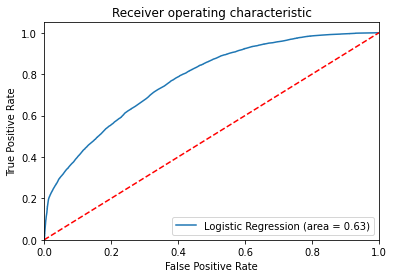

In [199]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1], pos_label=2)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()